In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [4]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
df["NObeyesdad"].value_counts()  # Target Analizi

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [8]:
def summary(dataframe,target,col): # Target and Features Analizi
    print(dataframe.groupby(target)[col].mean())

In [9]:
for col in df[["Age","Height","Weight","FAF","TUE","CH2O","NCP","FCVC"]]:
    summary(df,"NObeyesdad",col)

NObeyesdad
Insufficient_Weight    19.783237
Normal_Weight          21.738676
Obesity_Type_I         25.884941
Obesity_Type_II        28.233785
Obesity_Type_III       23.495554
Overweight_Level_I     23.417674
Overweight_Level_II    26.996981
Name: Age, dtype: float64
NObeyesdad
Insufficient_Weight    1.691117
Normal_Weight          1.676585
Obesity_Type_I         1.693804
Obesity_Type_II        1.771795
Obesity_Type_III       1.687559
Overweight_Level_I     1.687836
Overweight_Level_II    1.703748
Name: Height, dtype: float64
NObeyesdad
Insufficient_Weight     49.906330
Normal_Weight           62.155052
Obesity_Type_I          92.870198
Obesity_Type_II        115.305311
Obesity_Type_III       120.941114
Overweight_Level_I      74.266828
Overweight_Level_II     82.085271
Name: Weight, dtype: float64
NObeyesdad
Insufficient_Weight    1.250131
Normal_Weight          1.247387
Obesity_Type_I         0.986748
Obesity_Type_II        0.971857
Obesity_Type_III       0.664817
Overweight_Level_I 

In [10]:
def plot_numerical_col(dataframe,numerical_col): # Features Analizi
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

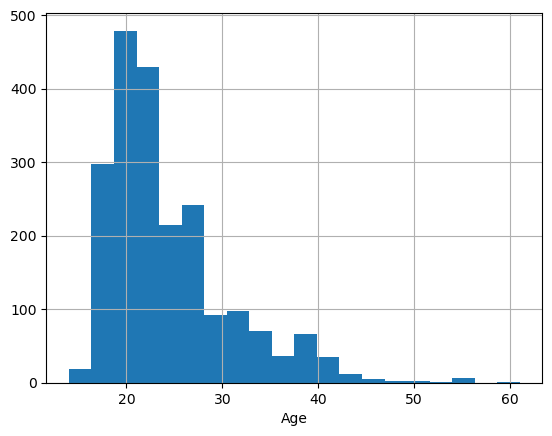

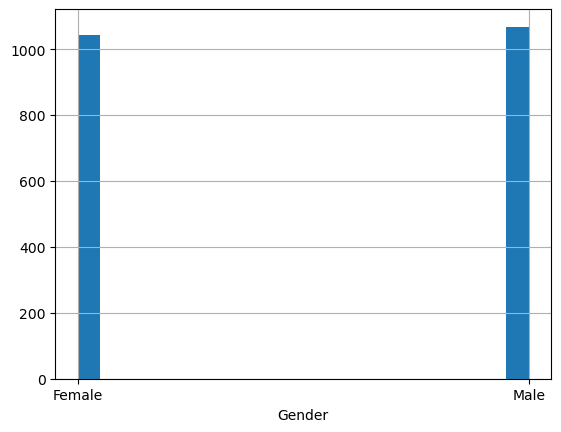

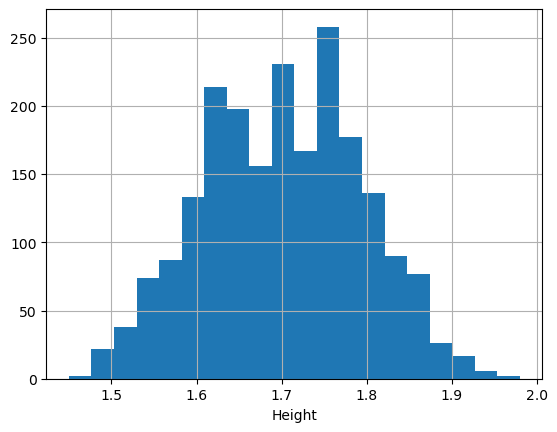

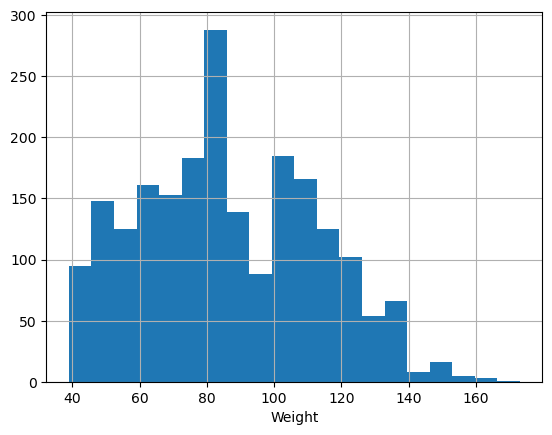

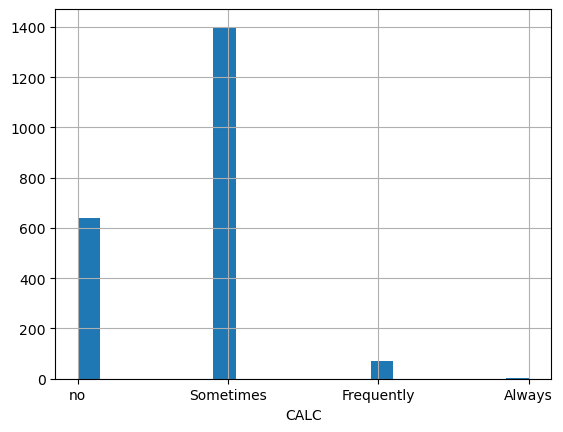

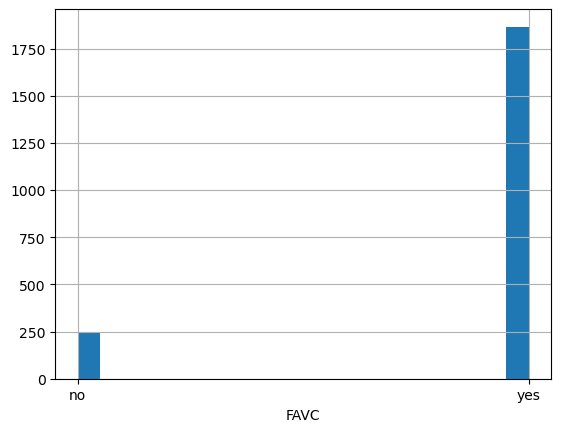

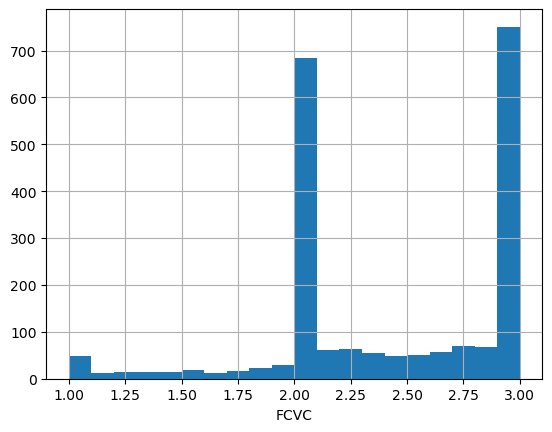

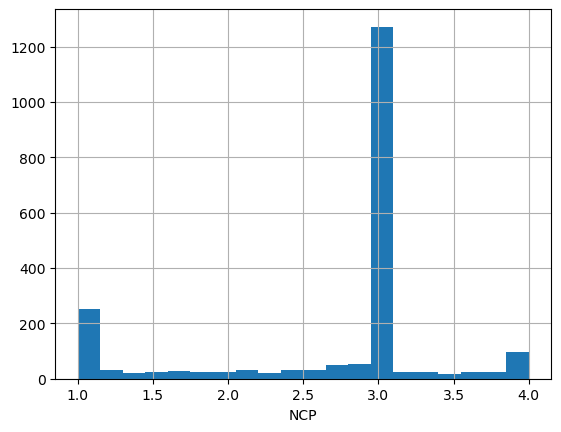

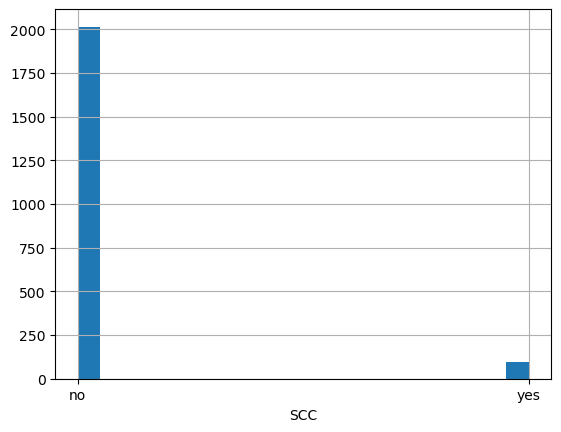

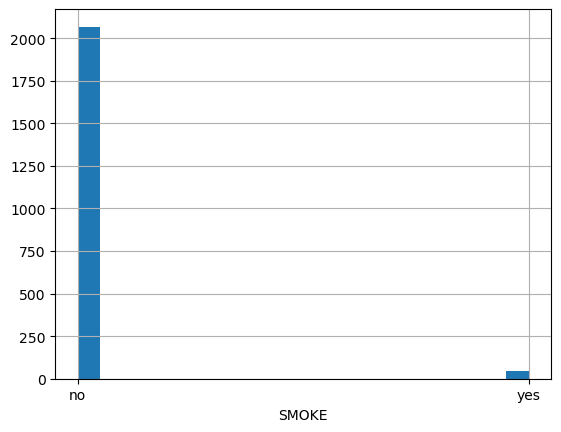

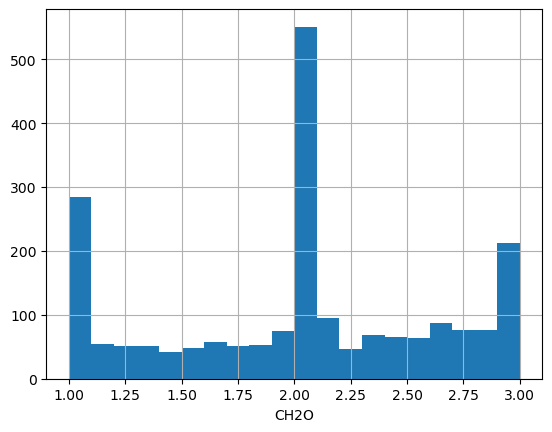

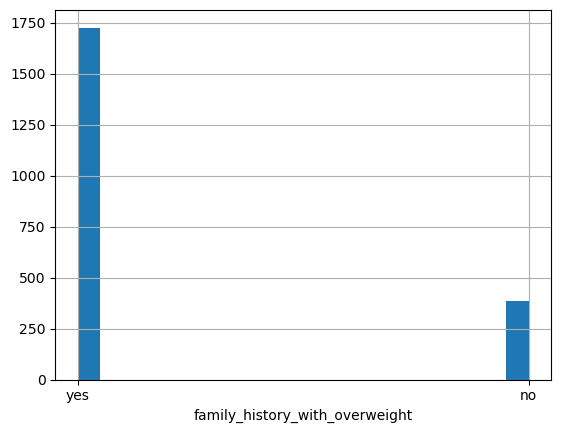

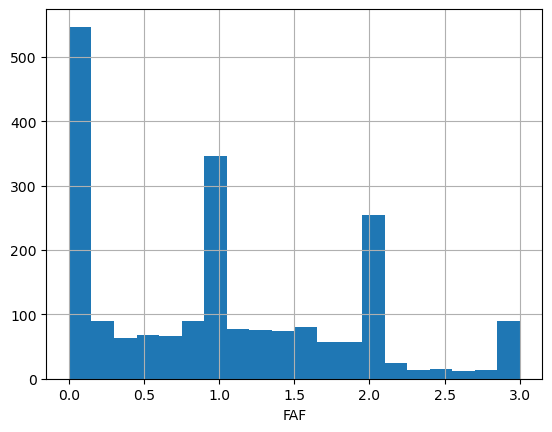

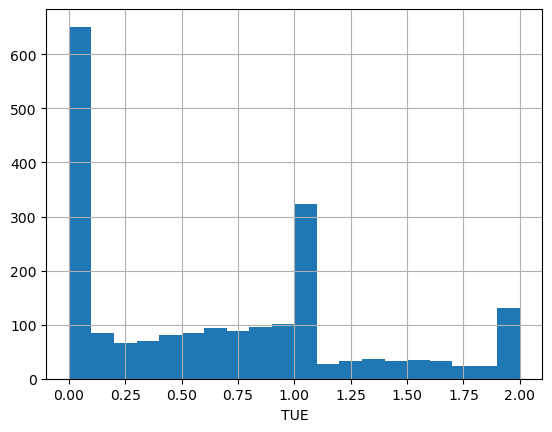

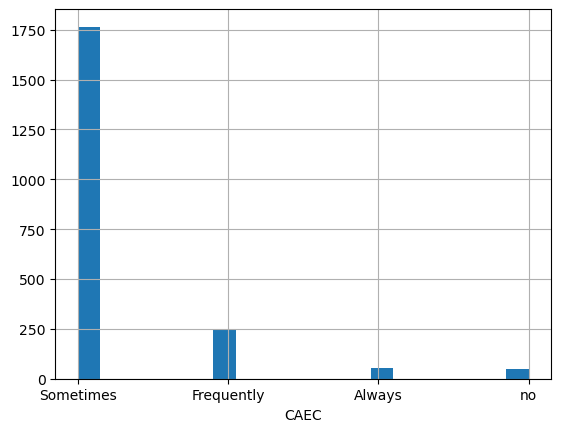

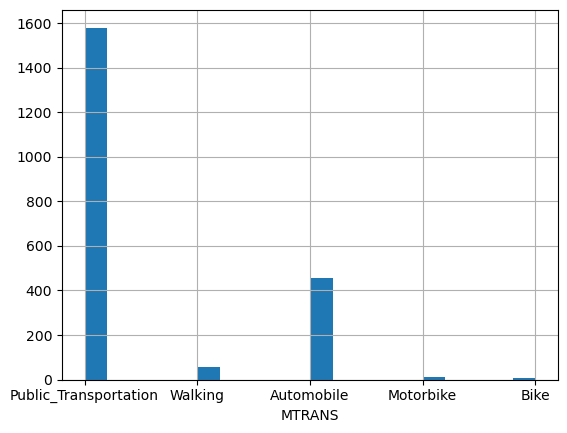

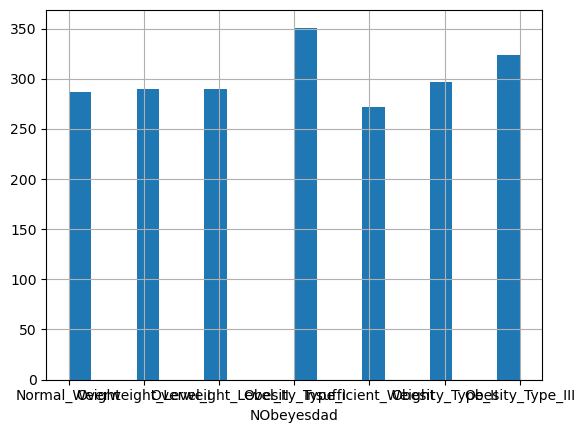

In [11]:
for col in df.columns:
    plot_numerical_col(df,col)

In [12]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2) # BMI özelliğini ekleme

In [13]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,24.386526
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,23.765432
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I,26.851852
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [14]:
df.groupby("NObeyesdad")["BMI"].mean()

NObeyesdad
Insufficient_Weight    17.404245
Normal_Weight          22.014147
Obesity_Type_I         32.255636
Obesity_Type_II        36.723424
Obesity_Type_III       42.273746
Overweight_Level_I     25.990772
Overweight_Level_II    28.215232
Name: BMI, dtype: float64

In [15]:
for col in df[["BMI","Age","Height","Weight","FCVC","NCP","CH2O","TUE","FAF"]]: # Gerekli sütunları seçme
    df[col]=RobustScaler().fit_transform(df[[col]]) # RobustScaler ile verileri ölçeklendirme (RobustScaler aykırı değerlere daha dayanıklıdır.)

In [16]:
y=df["NObeyesdad"] # Veriyi ikiye ayırma 
x=df[["BMI","Age","Height","Weight","FCVC","NCP","CH2O","TUE","FAF"]]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # Eğitim ve test verisi olarak ayırma

In [18]:
model=LogisticRegression().fit(x_train,y_train) # Lojistik Regresyon ile model kurma

In [19]:
y_pred=model.predict(x_test)

In [20]:
y_prob=model.predict_proba(x_test)[:,1]

In [21]:
print(classification_report(y_test,y_pred)) # Tahmin değerlerini gözlemleme

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      1.00      0.93        56
      Normal_Weight       0.96      0.76      0.85        62
     Obesity_Type_I       0.96      0.91      0.93        78
    Obesity_Type_II       0.94      1.00      0.97        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.65      0.66      0.65        56
Overweight_Level_II       0.65      0.68      0.67        50

           accuracy                           0.87       423
          macro avg       0.86      0.86      0.86       423
       weighted avg       0.87      0.87      0.86       423



In [22]:
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9848407954711508


In [23]:
roc_auc = roc_auc_score(y_train, model.predict_proba(x_train), multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9888482181836148


In [24]:
# Model Validation: 5 - Fold Cross Validation
y=df["NObeyesdad"]
x=df[["BMI","Age","Height","Weight","FCVC","NCP","CH2O","TUE","FAF"]]

In [25]:
log_model=LogisticRegression().fit(x,y)

In [44]:
cv=cross_validate(log_model,x,y,cv=5,scoring=["accuracy"]) # 5 katlı çapraz doğrulama yapma

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py", line 633, in roc_auc_score
    raise ValueError("multi_class must be in ('ovo', 'ovr')")
ValueEr

In [45]:
cv["test_accuracy"].mean()

0.8778001859881461

In [46]:
random_user=x.sample(random_state=64) # Yeni bir gözlem için tahmin yapma 

In [48]:
random_user

,BMI,Age,Height,Weight,FCVC,NCP,CH2O,TUE,FAF
1285,0.277508,3.231458,-0.39078,0.086751,0.430958,-2.12816,-0.311377,-0.62535,-0.648436


In [47]:
log_model.predict(random_user)

array(['Obesity_Type_I'], dtype=object)

In [49]:
random_user1=x.sample(random_state=81) # Yeni bir gözlem için tahmin yapma 2

In [51]:
random_user1

,BMI,Age,Height,Weight,FCVC,NCP,CH2O,TUE,FAF
465,-0.752497,-0.789368,-0.725813,-0.762679,-0.385502,0.0,-1.120313,0.37465,0.0


In [50]:
log_model.predict(random_user1)

array(['Normal_Weight'], dtype=object)